# Question - 6

['left', 'A', 'B', 'C', 'D', 'E', 'right']
[0.  0.5 0.5 0.5 0.5 0.5 1. ]
TOTAL EPISODES: 0
['left', 'A', 'B', 'C', 'D', 'E', 'right']
[0.  0.5 0.5 0.5 0.5 0.5 1. ]
TOTAL EPISODES: 1
['left', 'A', 'B', 'C', 'D', 'E', 'right']
[0.  0.5 0.5 0.5 0.5 0.5 1. ]
TOTAL EPISODES: 10
['left', 'A', 'B', 'C', 'D', 'E', 'right']
[0.  0.5 0.5 0.5 0.5 0.5 1. ]
TOTAL EPISODES: 100
['left', 'A', 'B', 'C', 'D', 'E', 'right']
[0.  0.5 0.5 0.5 0.5 0.5 1. ]


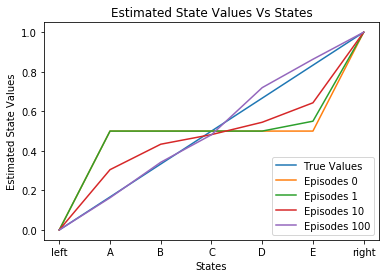

[0.    0.167 0.333 0.5   0.667 0.833 1.   ]
[0.    0.163 0.342 0.481 0.72  0.863 1.   ]
['left', 'A', 'B', 'C', 'D', 'E', 'right']
[0.  0.5 0.5 0.5 0.5 0.5 1. ]
['left', 'A', 'B', 'C', 'D', 'E', 'right']
[0.  0.5 0.5 0.5 0.5 0.5 1. ]
['left', 'A', 'B', 'C', 'D', 'E', 'right']
[0.  0.5 0.5 0.5 0.5 0.5 1. ]
['left', 'A', 'B', 'C', 'D', 'E', 'right']
[0.  0.5 0.5 0.5 0.5 0.5 1. ]
['left', 'A', 'B', 'C', 'D', 'E', 'right']
[0.  0.5 0.5 0.5 0.5 0.5 1. ]
['left', 'A', 'B', 'C', 'D', 'E', 'right']
[0.  0.5 0.5 0.5 0.5 0.5 1. ]
['left', 'A', 'B', 'C', 'D', 'E', 'right']
[0.  0.5 0.5 0.5 0.5 0.5 1. ]


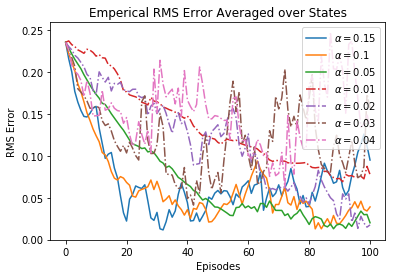

In [14]:
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)


class RandomWalk():
	def __init__(self):
		self.states = ["left","A","B","C","D","E","right"]
		self.values = np.ones((len(self.states)))*0.5
		self.values[0]=0
		self.values[6]=1
		
		self.done = False
		self.alpha = 0.1
		self.gamma = 1    # undiscounted 
		self.initialState = 3
		# self.policyPi =  np.random.randint(2, size=len(self.states))

		print(self.states)
		print(self.values)
		# print(self.policyPi)
		self.trueValues = np.zeros((len(self.states)))
		self.trueValues [1:6] = np.arange(1,6)/6.0
		self.trueValues[6] = 1
		

	def selectAction(self,currentState):
		
		action = np.random.binomial(1, 0.5)
		return action

	def takeAction(self,action,currentState):


		if(action == 0 ):
			nextState = currentState - 1
		
		else :
			nextState = currentState + 1

		reward = self.giveRewards(nextState)
		if(currentState == 6 or currentState == 0):
			nextState = currentState
		return reward, nextState
	 

	def giveRewards(self,state):

		if(state == 6):
			return 1.0
		else:
			return 0.0

	def simulateOneEpisodeTD(self,alpha):
		currentState = self.initialState
		path = [self.initialState]
		totalRewards = [0]



		while(True):


			currentAction = self.selectAction(currentState)
			currentReward , nextState = self.takeAction(currentAction,currentState)
			# print("ACTION TAKEN: ",currentAction)
			# print("REWARD: ",currentReward)
			# print("CURRENT STATE",currentState)
			# print("NEXT STATE",nextState)
			totalRewards.append(currentReward)
			path.append(currentState)

			if(nextState == 6 or nextState == 0 ):
				self.values[currentState] +=alpha*(currentReward-self.values[currentState])
				
			else:
				self.values[currentState] +=alpha*(currentReward+self.values[nextState]-self.values[currentState])
			# print(self.values)

			if(nextState == 6 or nextState == 0 ):
				break
			
			currentState = nextState
		# print(self.values)


	def simulateOneEpisodeMC(self,alpha):
		currentState = self.initialState
		path = [self.initialState]
		totalRewards = [0]

		while(True):


			currentAction = self.selectAction(currentState)
			currentReward , nextState = self.takeAction(currentAction,currentState)
			# print("ACTION TAKEN: ",currentAction)
			# print("REWARD: ",currentReward)
			# print("CURRENT STATE",currentState)
			# print("NEXT STATE",nextState)
			totalRewards.append(currentReward)
			path.append(currentState)
		
			if(currentState == 6):
				currentReward = 1.0

			if(currentState == 0):
				currentReward = 0.0


			if(currentState == 6 or currentState == 0 ):
				
				# print(currentReward)
				break
			
			currentState = nextState
		# print(self.values)
		# print("REWARD: ",currentReward)
		# print(path)
		
		for currentState in path[:-1]:
			self.values[currentState] += alpha*(currentReward-self.values[currentState])

		# print(self.values)

	def simulateMC(self):
		self.__init__()		
		for i in range(100):

			self.simulateOneEpisodeMC(self.alpha)


	def simulateTD(self,episodes):
		self.__init__()
		for i in range(episodes):
			self.simulateOneEpisodeTD(self.alpha)


	def plotStateValues(self):
		episodesList =[0,1,10,100]
		plt.figure()
		
		plt.xticks(np.arange(len(self.states)),self.states)
		plt.plot(np.arange(len(self.states)),self.trueValues,label = "True Values")

		for currentEpisodes in episodesList:
			print("TOTAL EPISODES:" ,currentEpisodes)
			self.simulateTD(currentEpisodes)
			plt.plot(np.arange(len(self.states)),self.values,label = "Episodes "+str(currentEpisodes))
		plt.title("Estimated State Values Vs States")
		plt.legend(loc = "lower right")
		plt.xlabel("States")
		plt.ylabel("Estimated State Values")
		plt.show()

	def calcRMSE(self):
		temp = np.sqrt(np.sum(np.square(self.trueValues - self.values))/5.0)

		return temp
	def plotRMSError(self):
		print(self.trueValues)
		print(self.values)
		tdAlphaList = [0.15,0.1,0.05]
		mcAlphaList = [0.01,0.02,0.03,0.04]
		totalEpisodes = 101
		plt.figure()
		for currentAlpha in tdAlphaList:
			errorList =[]
			self.__init__()
			for currentEpisode in range(totalEpisodes):
				rmseError = self.calcRMSE()
				self.simulateOneEpisodeTD(currentAlpha)
				errorList.append(rmseError)

			plt.plot(np.arange(101),errorList,label = r'$\alpha =$'+str(currentAlpha))
		
		for currentAlpha in mcAlphaList:
			errorList =[]
			self.__init__()
			for currentEpisode in range(totalEpisodes):
				rmseError = self.calcRMSE()
				self.simulateOneEpisodeMC(currentAlpha)
				errorList.append(rmseError)

			plt.plot(np.arange(101),errorList,linestyle = "dashdot",label = r'$\alpha =$'+str(currentAlpha))
		
	

		plt.xlabel("Episodes")
		plt.ylabel("RMS Error")
		plt.title("Emperical RMS Error Averaged over States")
		plt.legend(loc = 'upper right')
		plt.show()


		


if __name__ == "__main__":
	randomWalkObject = RandomWalk()
	# randomWalkObject.simulateTD(100)
	# randomWalkObject.simulateMC()
	randomWalkObject.plotStateValues()
	randomWalkObject.plotRMSError()




# Question - 7

## Q Learning

In [0]:
import numpy as np 
from matplotlib import pyplot as plt 
from tqdm import tqdm

class qLearningClass():
	def __init__(self):

		self.gridSize = [4,12]
		self.totalActions = 4
		self.QTable = np.zeros((self.gridSize[0],self.gridSize[1],self.totalActions))
		self.epsilon = 0.1
		self.alpha =  0.5
		self.gamma = 1.0

		self.totalEpisodes = 500
		self.actions = ["up","down", "right","left"]

		self.cliffPositions = [[3,1],[3,2],[3,3],[3,4],[3,5],[3,6],[3,7],[3,8],[3,9],[3,10]]
		self.initalState = [3,0]
		self.goalState = [3,11]

		print("GRID SIZE: ",self.gridSize)
		print("TOTAL ACTIONS: ",self.totalActions)
		print("Q-LEARNING TABLE SIZE: ",self.QTable.shape)
		print("ALL ACTIONS: ",self.actions)


		

	def __selectAction(self,currentState):
		randomNumber = np.random.rand()
			
		if(randomNumber<self.epsilon):
				action =  np.random.randint(self.totalActions)
				# print("RANDOM ACTION")
		else:
			action =  np.argmax(self.QTable[currentState[0],currentState[1],:])
			# print("ARGMAX ACTION: ",self.actions[actionIndex])
		return action				


	def __correspondinActions(self,action):

		if(action == 0):
			return [0,-1]
		elif(action == 1):
			return [0,1]
		elif (action == 2):
			return [-1,0]
		elif (action == 3):
			return [1,0]
			

	def __takeAction(self,currentAction,currentState):
		currentAction = self.__correspondinActions(currentAction) 	
		nextState = [currentAction[0]+currentState[0],currentAction[1]+currentState[1]]
		reward = -1
		

		if(nextState[1]<0 or nextState[1]>self.gridSize[1]-1 or nextState[0]<0 or nextState[0]>self.gridSize[0]-1):
			nextState = currentState
		
		
		
		if(nextState in  self.cliffPositions):
			# print("FOUND")
			nextState = self.initalState
			reward = -100

		if(nextState == self.goalState):
			# print("************************************************************************")
			reward = 0
		
		
		
		return reward , nextState

	def __updateQtable(self,currentReward,currentAction,currentState,nextState):
		# print(currentReward)
		# print(currentAction)
		# print(currentState)
		# print(nextState)
		self.QTable[currentState[0],currentState[1],currentAction] +=self.alpha * (currentReward+self.gamma*np.max(self.QTable[nextState[0],nextState[1],:])\
																					-self.QTable[currentState[0],currentState[1],currentAction]) 
		# target = currentReward + self.gamma*np.max(self.QlearningTable[nextState[0],nextState[1],:])
		# error = target - self.QlearningTable[currentState[0],currentState[1],self.actions.index(currentAction)]
		# self.QlearningTable[currentState[0],currentState[1],self.actions.index(currentAction)] += self.alpha*(error) 
	

	def simulateOneEpisode(self):
		episodeReward = 0.0
		currentState = self.initalState
		path = []
		# print("CURRENT STATE: ",currentState)
		# currentAction = self.__selectAction(currentState)
		# print("CURRENT ACTION: ",currentAction)		
		# reward,nextState =self.__takeAction(currentAction,currentState)
		# episodeReward +=reward
		# print("REWARD: ",reward)
		# print("Next State: ",nextState)
		# self.__updateQtable(reward,currentAction,currentState,nextState)


		while(True):
			path.append(currentState)
			# print("CURRENT STATE: ",currentState)
			currentAction = self.__selectAction(currentState)
			# print("CURRENT ACTION: ",currentAction)		
			reward,nextState =self.__takeAction(currentAction,currentState)
			episodeReward +=reward
			# print("REWARD: ",reward)
			# print("Next State: ",nextState)
			self.__updateQtable(reward,currentAction,currentState,nextState)

			if(nextState == self.goalState):
				# print(self.QlearningTable)
				# print("YOLO")
				break
			else:
				currentState = nextState


			
		return episodeReward, path

	def simulate(self):
		runs =100
		totalRewards =np.zeros(self.totalEpisodes)
		for i in range(runs):
# 			print(i)
			for currentEpisode in range(self.totalEpisodes):
				# print("CURRENT EPISDOE: ",currentEpisode)
				currentRewards,currentTrajectory = self.simulateOneEpisode() 
				totalRewards[currentEpisode] +=currentRewards
					# print(totalRewards[currentEpisode])

		totalRewards /=runs		
		currentRewards,currentTrajectory = self.simulateOneEpisode() 
		print(currentTrajectory)
		return totalRewards
		

## SARSA

In [0]:
import numpy as np 
from matplotlib import pyplot as plt 
from tqdm import tqdm

class Sarsa():
	def __init__(self):

		self.gridSize = [4,12]
		self.totalActions = 4
		self.QTable = np.zeros((self.gridSize[0],self.gridSize[1],self.totalActions))
		self.epsilon = 0.1
		self.alpha =  0.5
		self.gamma = 1.0

		self.totalEpisodes = 500
		self.actions = ["up","down", "right","left"]

		self.cliffPositions = [[3,1],[3,2],[3,3],[3,4],[3,5],[3,6],[3,7],[3,8],[3,9],[3,10]]
		self.initalState = [3,0]
		self.goalState = [3,11]

		print("GRID SIZE: ",self.gridSize)
		print("TOTAL ACTIONS: ",self.totalActions)
		print("Q-LEARNING TABLE SIZE: ",self.QTable.shape)
		print("ALL ACTIONS: ",self.actions)


		

	def __selectAction(self,currentState):
		randomNumber = np.random.rand()
			
		if(randomNumber<self.epsilon):
				action =  np.random.randint(self.totalActions)
				# print("RANDOM ACTION")
		else:
			action =  np.argmax(self.QTable[currentState[0],currentState[1],:])
			# print("ARGMAX ACTION: ",self.actions[actionIndex])
		return action				


	def __correspondinActions(self,action):

		if(action == 0):
			return [0,-1]
		elif(action == 1):
			return [0,1]
		elif (action == 2):
			return [-1,0]
		elif (action == 3):
			return [1,0]
			

	def __takeAction(self,currentAction,currentState):
		currentAction = self.__correspondinActions(currentAction) 	
		nextState = [currentAction[0]+currentState[0],currentAction[1]+currentState[1]]
		reward = -1
		

		if(nextState[1]<0 or nextState[1]>self.gridSize[1]-1 or nextState[0]<0 or nextState[0]>self.gridSize[0]-1):
			nextState = currentState
		
		
		
		if(nextState in  self.cliffPositions):
			# print("FOUND")
			nextState = self.initalState
			reward = -100

		if(nextState == self.goalState):
			# print("************************************************************************")
			reward = 0
		
		
		
		return reward , nextState

	def __updateQtable(self,currentReward,currentAction,currentState,nextState):
		# print(currentReward)
		# print(currentAction)
		# print(currentState)
		# print(nextState)
		nextAction = self.__selectAction(nextState)
		self.QTable[currentState[0],currentState[1],currentAction] +=self.alpha * (currentReward+self.gamma*(self.QTable[nextState[0],nextState[1],nextAction])\
																					-self.QTable[currentState[0],currentState[1],currentAction]) 
		# target = currentReward + self.gamma*np.max(self.QlearningTable[nextState[0],nextState[1],:])
		# error = target - self.QlearningTable[currentState[0],currentState[1],self.actions.index(currentAction)]
		# self.QlearningTable[currentState[0],currentState[1],self.actions.index(currentAction)] += self.alpha*(error) 
	

	def simulateOneEpisode(self):
		episodeReward = 0.0
		currentState = self.initalState
		path = []
		# print("CURRENT STATE: ",currentState)
		# currentAction = self.__selectAction(currentState)
		# print("CURRENT ACTION: ",currentAction)		
		# reward,nextState =self.__takeAction(currentAction,currentState)
		# episodeReward +=reward
		# print("REWARD: ",reward)
		# print("Next State: ",nextState)
		# self.__updateQtable(reward,currentAction,currentState,nextState)


		while(True):
			path.append(currentState)
			# print("CURRENT STATE: ",currentState)
			currentAction = self.__selectAction(currentState)
			# print("CURRENT ACTION: ",currentAction)		
			reward,nextState =self.__takeAction(currentAction,currentState)
			episodeReward +=reward
			# print("REWARD: ",reward)
			# print("Next State: ",nextState)
			self.__updateQtable(reward,currentAction,currentState,nextState)

			if(nextState == self.goalState):
				# print(self.QlearningTable)
				# print("YOLO")
				break
			else:
				currentState = nextState


			
		return episodeReward, path

	def simulate(self):
		runs =100
		totalRewards =np.zeros(self.totalEpisodes)
		for i in range(runs):
# 			print(i)
			for currentEpisode in range(self.totalEpisodes):
				# print("CURRENT EPISDOE: ",currentEpisode)
				currentRewards,currentTrajectory = self.simulateOneEpisode() 
				totalRewards[currentEpisode] +=currentRewards
					# print(totalRewards[currentEpisode])

		totalRewards /=runs		
		currentRewards,currentTrajectory = self.simulateOneEpisode() 
		print(currentTrajectory)
		return totalRewards


GRID SIZE:  [4, 12]
TOTAL ACTIONS:  4
Q-LEARNING TABLE SIZE:  (4, 12, 4)
ALL ACTIONS:  ['up', 'down', 'right', 'left']
GRID SIZE:  [4, 12]
TOTAL ACTIONS:  4
Q-LEARNING TABLE SIZE:  (4, 12, 4)
ALL ACTIONS:  ['up', 'down', 'right', 'left']
[[3, 0], [2, 0], [1, 0], [0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 8], [0, 9], [0, 10], [0, 11], [1, 11], [2, 11]]
[[3, 0], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 11]]


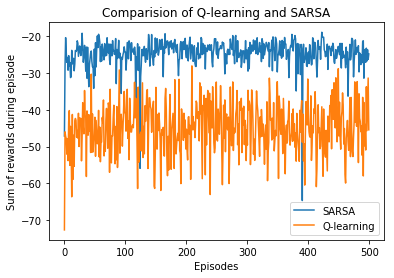

In [12]:
from matplotlib import pyplot as plt
import numpy as np 
%matplotlib inline

if __name__ == "__main__":
	plt.figure()
	sarsaObject = Sarsa()
	qLearningObject = qLearningClass()

	totalRewardsSarsa = sarsaObject.simulate()
	totalRewardsQlearning = qLearningObject.simulate()


	plt.plot(np.arange(sarsaObject.totalEpisodes),totalRewardsSarsa,label = "SARSA")
	plt.plot(np.arange(qLearningObject.totalEpisodes),totalRewardsQlearning,label = "Q-learning")
	plt.title("Comparision of Q-learning and SARSA")
	plt.xlabel("Episodes")
	plt.ylabel("Sum of rewards during episode")
	plt.legend(loc="lower right")
	plt.show()
  

# Question - 4

## Blackjack

In [16]:
import numpy as np 
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import random
class blackjack():
	def __init__(self):
		self.totalStates = [10,10,2]
		# self.playerStateValues = np.zeros((self.totalStates[0],self.totalStates[1],self.totalStates[2],2))
		self.playerStateValues = {}

		self.playerStates = []
		self.totalPlayerWins = 0
		self.totalPlayerLoose = 0
		self.totalPlayerDraws = 0
		# self.totalEpisodes = 10000
		self.totalEpisodes = 500000

		self.actionList = []
		self.totalActions =  ["hit","stick"]
		self.cardList = list(np.arange(1,11))+[10,10,10]
		


	def randomStates(self):
		allStates = []

		for i in range(11,22):
			for j in range (1,11):
				for k in [True,False]:
					for l in ["hit","stick"]:
						allStates.append((i,j,k,l))
		# print(allStates)
		return random.choice(allStates)



	def __selectCard(self):
		
		return np.random.choice(self.cardList)
		

	def dealerPolicy(self,currentValue,aceFlag,done):
		if(currentValue>21):
			if(aceFlag):
				currentValue -=10
				aceFlag=False
			else:
				done = True
		if currentValue >= 17:
			done =True

		else:
			selectedCard = self.__selectCard()
			# print("SELECTED CARD DEALER: ",selectedCard)

			if(selectedCard==1 and currentValue<=10):
				currentValue +=11
				aceFlag =True
				done = True
			else:
				currentValue +=selectedCard
				aceFlag =False
				done = False
		return currentValue,aceFlag,done



	def playerPolicy(self,currentValue,aceFlag,done):
		if(currentValue>21):
			if(aceFlag):
				currentValue -= 10
				aceFlag = False
			else:
				done = True

		if currentValue >= 20:
			done =True
			
		else:
			selectedCard = self.__selectCard()

			# print("SELECTED CARD PLAYER: ",selectedCard)
			if(selectedCard==1 and currentValue<=10):
				currentValue +=11
				aceFlag =True
				done = False
			else:
				currentValue +=selectedCard
				aceFlag =False
				done = False

		return currentValue,aceFlag,done

	def __selectWinner(self,playerValue,dealerValue):
		
		lastState = self.playerStates[-1]
		# print("LAST STATE: ",lastState)

		if(playerValue>21):
			if(dealerValue>21):
				# print("DRAW")
				self.totalPlayerDraws += 1
				self.playerStateValues[lastState] += 0


			else: 
				self.playerStateValues[lastState] -= 1
				
		else :
			if(dealerValue>21):
				self.playerStateValues[lastState] += 1
				self.totalPlayerWins += 1

			else:
				if(playerValue < dealerValue):

					self.playerStateValues[lastState] -= 1				
					self.totalPlayerLoose += 1

				elif (playerValue > dealerValue):
					self.playerStateValues[lastState] += 1
					self.totalPlayerWins += 1

				else:
					self.playerStateValues[lastState] += 0				
					self.totalPlayerDraws += 1


					  

	def simulateOneEpisodeOnPolicy(self):
		dealerValue = 0.0
		playerValue = 0.0
		dealerValue += self.__selectCard()
		showCard = dealerValue
		dealerValue += self.__selectCard()
		self.playerStates = []

		
		aceFlag = False
		done = False
		# print("*************INTIALIZATION DONE**********")

		while(True):
			playerValue , aceFlag , done = self.playerPolicy(playerValue,aceFlag,done)

			if done:
				break

			if(playerValue>=12 and playerValue<=21):
				self.playerStates.append((playerValue,showCard,aceFlag))

		aceFlag = False
		done = False

		while(True):

			dealerValue , aceFlag , done = self.dealerPolicy(dealerValue,aceFlag,done)

			if done:
				break
			# print(dealerValue)
		# print(self.playerStates)

		for s in self.playerStates:
			if(self.playerStateValues.get(s) is None):
				self.playerStateValues[s] = 0
			else:
				pass


		self.__selectWinner(playerValue,dealerValue)		

	def simulate(self):

		for i in range(10000):

			if(i%1000==0):
				print("Episode: ",i)
			self.simulateOneEpisodeOnPolicy()
# 
		self.plotFigure_5_1()
		




	def plotFigure_5_1(self):
		# usableAce = {}
		# nonUsableAce = {}
		x1,y1,z1,x2,y2,z2=[],[],[],[],[],[]
		
		for keys , values in self.playerStateValues.items():
			if(keys[2]==True):
				x1.append(keys[1])
				y1.append(keys[0])
				z1.append(values)

				
				# usableAce[keys]=values
			else:
				# nonUsableAce[keys]=values
				x2.append(keys[1])
				y2.append(keys[0])
				z2.append(values)
				
		fig = plt.figure()
		ax = fig.add_subplot(111, projection='3d')
		ax.scatter(x1,y1,z1)

		fig = plt.figure()
		ax = fig.add_subplot(111, projection='3d')
		ax.scatter(x2,y2,z2)
#     plt.xlabel
		plt.show()










if __name__ == "__main__":
	blackjackObject = blackjack()
	blackjackObject.simulate()


Episode:  0


ValueError: ignored